# Assignment 3

- Nama : Umniya Zahra
- Kode Peserta : PYTN-KS015-004
- Program : Python for data science


# Dataset  = bank-additional-full.csv

# Import Library

In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (5,5)})

import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



In [396]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [397]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [398]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [399]:
df.shape

(41188, 21)

In [400]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [401]:
df1.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [402]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [403]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

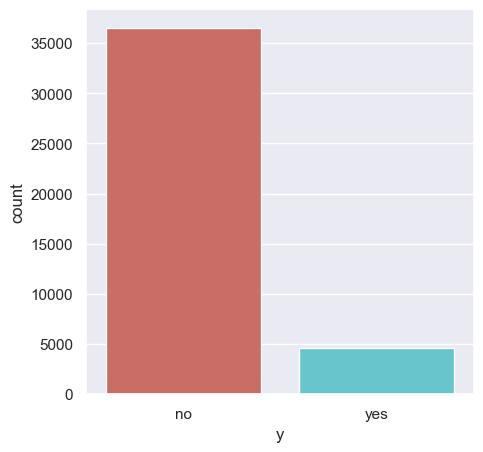

<Figure size 500x500 with 0 Axes>

In [404]:
sns.countplot(x='y', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [405]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [406]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [407]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750


In [408]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


# Vizualitation

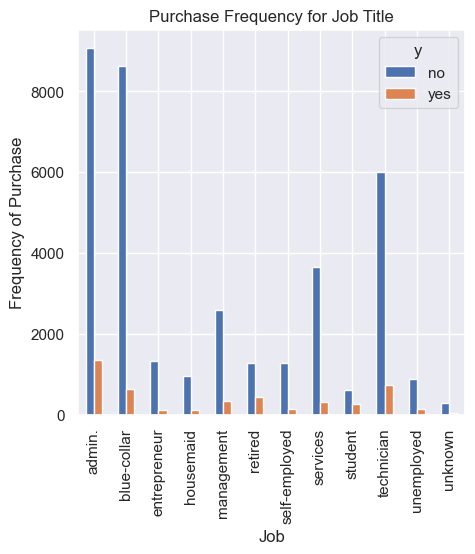

In [409]:
%matplotlib inline
pd.crosstab(df1.job, df1.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

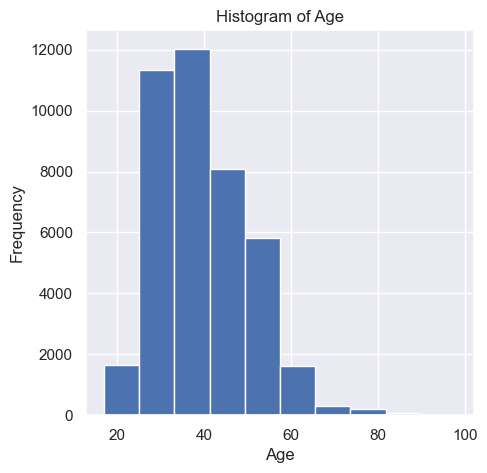

In [410]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

# Logistic Regression

In [411]:
categoric = [i for i in df1.columns if df1[i].dtypes == 'object']
numerics = [i for i in df1.columns if df1[i].dtypes != 'object']

In [412]:
x = df1.drop(['y'], axis = 1)
y = df1['y']

In [413]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [414]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [415]:
df_x = pd.get_dummies(x1)
df_x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [416]:
df_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [417]:
X_train,X_test,y_train,y_test = train_test_split(df_x,y,test_size=0.25, random_state=123)


In [418]:
log_mod = LogisticRegression(max_iter=1000)
log_mod.fit(X_train,y_train)
y_predict1= log_mod.predict(X_test)

In [419]:
confusionmatrix1 = confusion_matrix(y_test, y_predict1)
confusionmatrix1

array([[8894,  220],
       [ 680,  503]], dtype=int64)

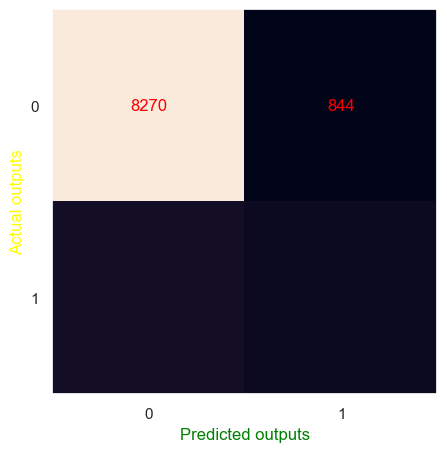

In [420]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(confusionmatrix1)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color = 'green')
ax.set_ylabel('Actual outputs', color =  'yellow')
ax.xaxis.set(ticks=(0, 1))
ax.yaxis.set(ticks=(0, 1))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

In [421]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      9114
         yes       0.70      0.43      0.53      1183

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.90     10297



In [422]:
print("accuracy1:", accuracy_score(y_test, y_predict1) )

accuracy1: 0.9125959017189472


# KNN

In [423]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_predict2 = model_knn.predict(X_test)



In [424]:
confusionmatrix2 = confusion_matrix(y_test1, y_predict1_2)
confusionmatrix2

array([[8713,  401],
       [ 602,  581]], dtype=int64)

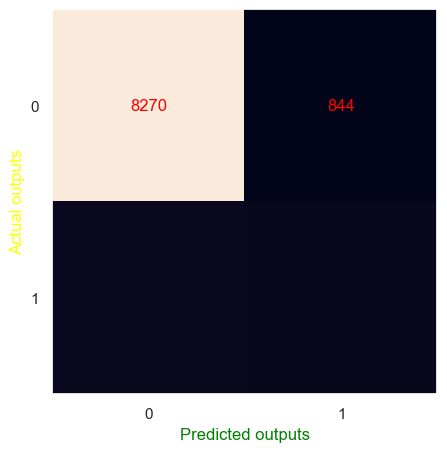

In [425]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(confusionmatrix2)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color = 'green')
ax.set_ylabel('Actual outputs', color =  'yellow')
ax.xaxis.set(ticks=(0, 1))
ax.yaxis.set(ticks=(0, 1))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

In [426]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      9114
         yes       0.59      0.49      0.54      1183

    accuracy                           0.90     10297
   macro avg       0.76      0.72      0.74     10297
weighted avg       0.90      0.90      0.90     10297



In [427]:
print("accuracy2:", accuracy_score(y_test, y_predict2))

accuracy2: 0.9025929882490046


# SVM

In [428]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_predict3= model_svm.predict(X_test)

In [429]:
confusionmatrix3 = confusion_matrix(y_test, y_predict3)
confusionmatrix3

array([[8980,  134],
       [ 919,  264]], dtype=int64)

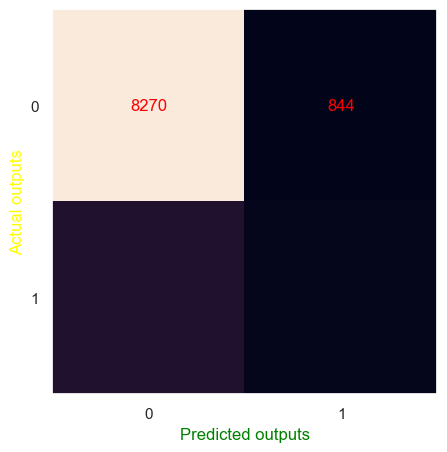

In [430]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(confusionmatrix3)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color = 'green')
ax.set_ylabel('Actual outputs', color =  'yellow')
ax.xaxis.set(ticks=(0, 1))
ax.yaxis.set(ticks=(0, 1))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

In [431]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      9114
         yes       0.66      0.22      0.33      1183

    accuracy                           0.90     10297
   macro avg       0.79      0.60      0.64     10297
weighted avg       0.88      0.90      0.87     10297



In [432]:
print("accuracy3:", accuracy_score(y_test, y_predict3))

accuracy3: 0.8977372050111683


# Decission Tree

In [433]:
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_predict4 =dt_model.predict(X_test)

In [434]:
confusionmatrix4 = confusion_matrix(y_test, y_predict4)
confusionmatrix4

array([[8498,  616],
       [ 541,  642]], dtype=int64)

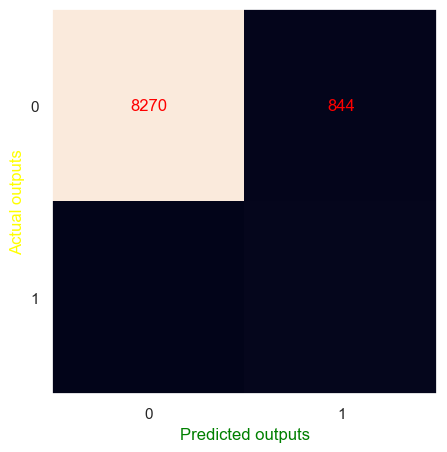

In [435]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(confusionmatrix4)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color = 'green')
ax.set_ylabel('Actual outputs', color =  'yellow')
ax.xaxis.set(ticks=(0, 1))
ax.yaxis.set(ticks=(0, 1))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

In [436]:
print(classification_report(y_test, y_predict4))

              precision    recall  f1-score   support

          no       0.94      0.93      0.94      9114
         yes       0.51      0.54      0.53      1183

    accuracy                           0.89     10297
   macro avg       0.73      0.74      0.73     10297
weighted avg       0.89      0.89      0.89     10297



In [437]:
print("accuracy4:", accuracy_score(y_test, y_predict4))

accuracy4: 0.8876371758764688


# Random Forest

In [438]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_predict5 = rf_model.predict(X_test)

In [439]:
confusionmatrix5 = confusion_matrix(y_test, y_predict5)
confusionmatrix5

array([[8816,  298],
       [ 599,  584]], dtype=int64)

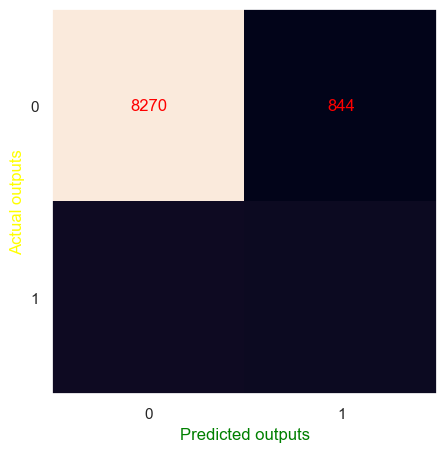

In [440]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(confusionmatrix5)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color = 'green')
ax.set_ylabel('Actual outputs', color =  'yellow')
ax.xaxis.set(ticks=(0, 1))
ax.yaxis.set(ticks=(0, 1))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

In [441]:
print(classification_report(y_test, y_predict5))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95      9114
         yes       0.66      0.49      0.57      1183

    accuracy                           0.91     10297
   macro avg       0.80      0.73      0.76     10297
weighted avg       0.90      0.91      0.91     10297



In [442]:
print("accuracy5:", accuracy_score(y_test, y_predict1))

accuracy5: 0.9125959017189472


# Naive Bayes

In [443]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_predict6 = nb_model.predict(X_test)

In [444]:
confusionmatrix6 = confusion_matrix(y_test1, y_predict1_6)
confusionmatrix6

array([[8270,  844],
       [ 562,  621]], dtype=int64)

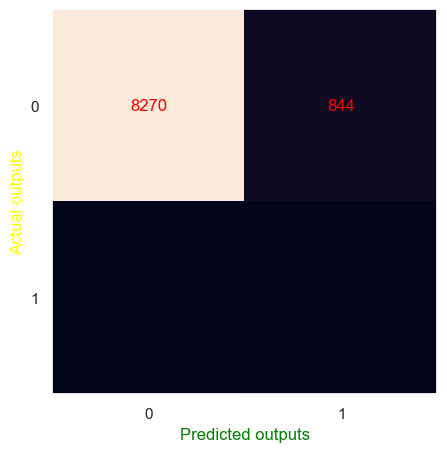

In [445]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(confusionmatrix6)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color = 'green')
ax.set_ylabel('Actual outputs', color =  'yellow')
ax.xaxis.set(ticks=(0, 1))
ax.yaxis.set(ticks=(0, 1))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

In [446]:
print(classification_report(y_test, y_predict6))

              precision    recall  f1-score   support

          no       0.94      0.91      0.92      9114
         yes       0.42      0.52      0.47      1183

    accuracy                           0.86     10297
   macro avg       0.68      0.72      0.70     10297
weighted avg       0.88      0.86      0.87     10297



In [447]:
print("accuracy6", accuracy_score(y_test, y_predict6))

accuracy6 0.8634553753520443


# Conclusion

In [449]:
print("LogisticRegression:", accuracy_score(y_test, y_predict1))
print("KKN:", accuracy_score(y_test, y_predict2))
print("SVM:", accuracy_score(y_test, y_predict3))
print("Decission Tree:", accuracy_score(y_test, y_predict4))
print("Random Forest:", accuracy_score(y_test, y_predict5))
print("Naive Bayes:", accuracy_score(y_test, y_predict6))

LogisticRegression: 0.9125959017189472
KKN: 0.9025929882490046
SVM: 0.8977372050111683
Decission Tree: 0.8876371758764688
Random Forest: 0.9128872487132175
Naive Bayes: 0.8634553753520443


Saya akan memilih menggunakan algorutma Random Forest dikarenakan akurasinya dinilai paling tinggi dalam pengolahan data tersebut, sehingga nantinya data saya ke akuratannya akan mendekati 1 atau 100%